#Red neuronal
Modelado y desarrollo de una red para clasificar imagenes.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset: Natural images
URL:https://www.kaggle.com/prasunroy/natural-images

Este dataset contiene images de 8 clases diferentes:


1-Airplane

2-Car

3-Cat

4-Dog

5-Flower

6-Fruit

7-Motorbike

8-Person

#Ejemplos

test  train  validation


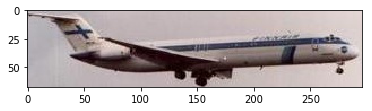

In [0]:
!ls "/content/drive/My Drive/RN/DS/natural_images"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/RN/DS/natural_images/train/airplane/airplane_0100.jpg', 'r')
imshow(np.asarray(pil_im))
print("Airplane")

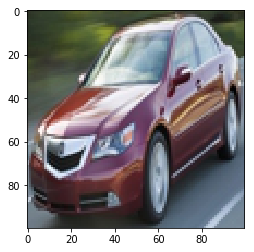

In [0]:
pil = Image.open('/content/drive/My Drive/RN/DS/natural_images/train/car/car_0009.jpg', 'r')
imshow(np.asarray(pil))

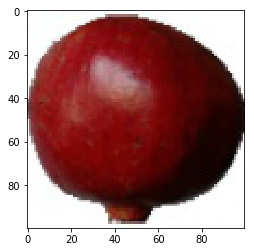

In [0]:
pil = Image.open('/content/drive/My Drive/RN/DS/natural_images/train/fruit/fruit_0001.jpg', 'r')
imshow(np.asarray(pil))

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

#Prepara imagenes
Cargamos las imagenes que se encuentran en Drive.

Modificamos las imagenes y las preparamos para trabajar con ellas.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt
import numpy

# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/RN/DS/natural_images/train/'
validation_data_dir = '/content/drive/My Drive/RN/DS/natural_images/validation/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 5898 images belonging to 8 classes.
Found 1001 images belonging to 8 classes.


#Diseño del modelo
Diseñamos el modelo para entrenar nuestra red, probando hyperparametros y capas de la red.

In [0]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

#Entrenamiento de la red
Con las imagenes preparadas y un modelo diseñado podemos empezar a entrenar nuestro modelo.

Despues de un tiempo de entrenamiento podemos ver en las graficas la velocidad de aprendizaje y el error del modelo conforme va el entrenamiento.


Epoch 1/10
100/100 [==============================] - 36s 364ms/step - loss: 1.6435 - acc: 0.3990 - val_loss: 1.2040 - val_acc: 0.5899
Epoch 2/10
100/100 [==============================] - 32s 320ms/step - loss: 0.9920 - acc: 0.6580 - val_loss: 0.9756 - val_acc: 0.6495
Epoch 3/10
100/100 [==============================] - 33s 332ms/step - loss: 0.7471 - acc: 0.7302 - val_loss: 0.6845 - val_acc: 0.7748
Epoch 4/10
100/100 [==============================] - 32s 317ms/step - loss: 0.6487 - acc: 0.7715 - val_loss: 0.6796 - val_acc: 0.7661
Epoch 5/10
100/100 [==============================] - 34s 345ms/step - loss: 0.5793 - acc: 0.7795 - val_loss: 0.8526 - val_acc: 0.7889
Epoch 6/10
100/100 [==============================] - 32s 322ms/step - loss: 0.5024 - acc: 0.8199 - val_loss: 0.7138 - val_acc: 0.7851
Epoch 7/10
100/100 [==============================] - 32s 317ms/step - loss: 0.5038 - acc: 0.8180 - val_loss: 0.5573 - val_acc: 0.8350
Epoch 8/10
100/100 [==============================] - 3

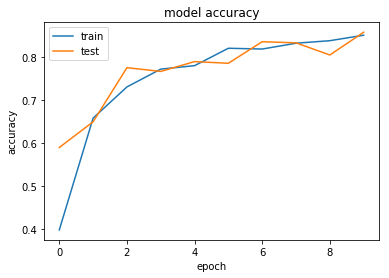

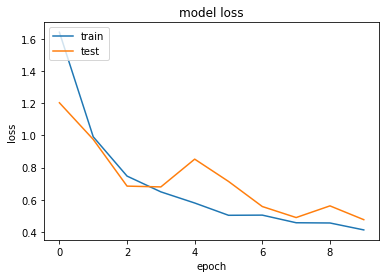

In [0]:
# TRAINING --------------------------------------------------

epochs = 10

history= model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=200,
)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()